## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
df=pd.read_csv('spamSMS.csv')

In [3]:
df.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [6]:
df.shape

(5574, 2)

We see that there are a total of 5574 records and two columns. 

In [7]:
df.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
ham         4827   4518                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

            
      freq  
Class       
ham     30  
spam     4

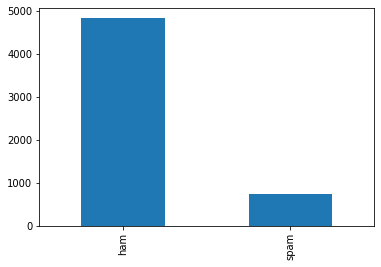

In [8]:
df.Class.value_counts().plot.bar();

Also observed that number of legitimate messages(ham) are much more than spam messages.

In [9]:
df['spam'] = df['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head()

,Class,input Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
df['length'] = df['input Text'].apply(len)

In [11]:
df.head()

,Class,input Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<Figure size 432x288 with 0 Axes>

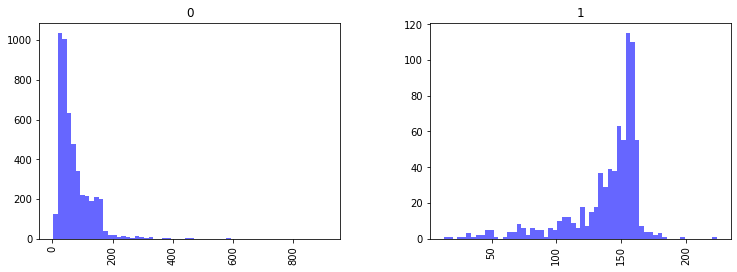

<Figure size 432x288 with 0 Axes>

In [12]:
df.hist(column='length',by='spam',bins=60,figsize=(12,4),color='blue',alpha=0.6);
plt.figure()

Text(0.5, 0, 'Message Length')

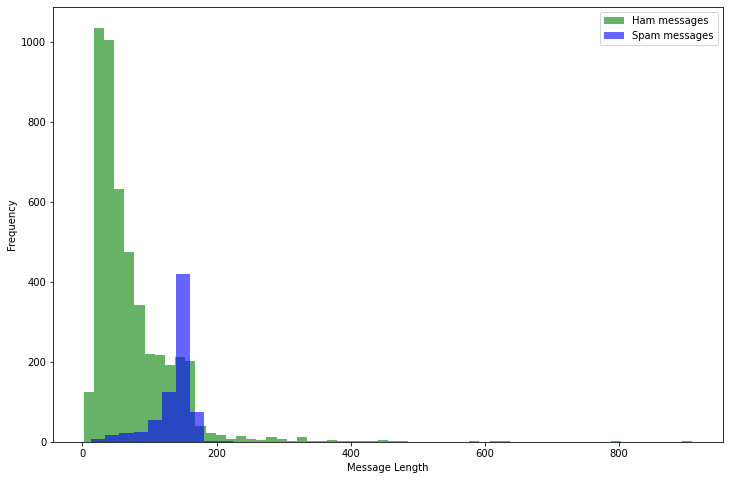

In [13]:
plt.figure(figsize=(12, 8))

df[df.Class=='ham'].length.plot(bins=60, kind='hist', color='green', 
                                       label='Ham messages', alpha=0.6)
df[df.Class=='spam'].length.plot(kind='hist', color='blue', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

We can observe that spam messages tend to have more characters.

The spam messages are generally longer than ham messages:
Bulk of ham has length below 100, for spam it is above 100.

### Describe data using wordcloud

In [14]:
ham  = df[df['spam'] == 0].copy()
spam = df[df['spam'] == 1].copy()

In [18]:
import wordcloud

In [19]:
def show_wordcloud(data, title):
    text = ' '.join(data['input Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',colormap='inferno', width=800, height=800).generate(text)
    
    plt.figure(figsize=(10,10))#, frameon=True
    plt.imshow(fig_wordcloud)  
    #plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

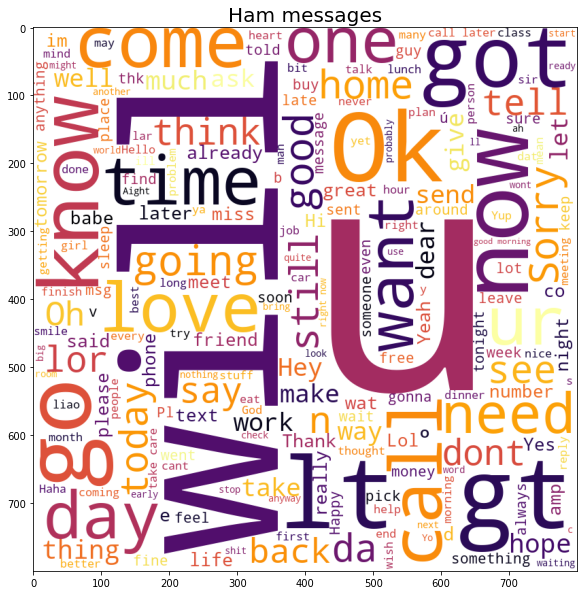

In [20]:
show_wordcloud(ham, "Ham messages")

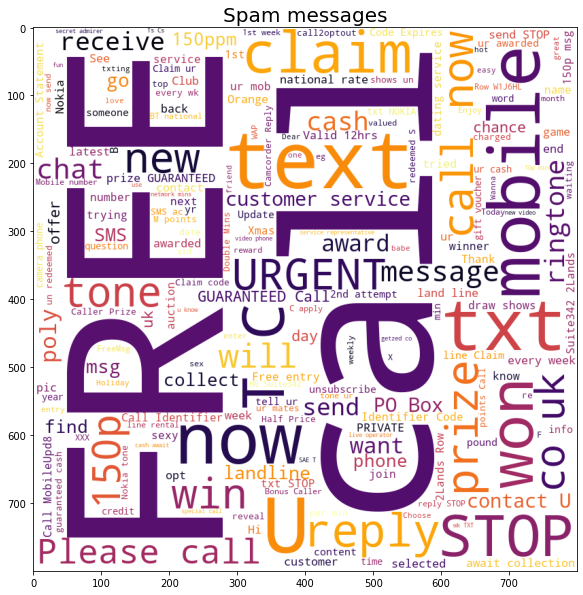

In [21]:
show_wordcloud(spam, "Spam messages")

So we can observe that Spam messages mostly contain words like FREE, text, call, won, prize, etc

## Data Preprocessing

#### 1. Remove Punctuation and Stopwords

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
from nltk.corpus import stopwords
stopwords.words("english")[10:15]

["you've", "you'll", "you'd", 'your', 'yours']

With the above lists for punctuation characters and stop words, we define a function to remove these from the text.

This function will also convert all text to lowercase.

In [26]:
def remove_punctuation_and_stopwords(message):
    
    message_without_punc = [ch for ch in message if ch not in string.punctuation]
    message_without_punc = "".join(message_without_punc).split()
    
    message_without_punc_stopwords = \
        [word.lower() for word in message_without_punc if word.lower() not in stopwords.words("english")]
        
    return message_without_punc_stopwords

In [27]:
check = df['input Text'].apply(remove_punctuation_and_stopwords)

In [28]:
check[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

# Visualization after preprocessing

## Let's see what top 20 spam words are !

In [29]:
from collections import Counter

In [30]:
spam.loc[:, 'input Text'] = spam['input Text'].apply(remove_punctuation_and_stopwords)
words_spam = spam['input Text'].tolist()

In [31]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [32]:
c_spam = Counter(list_spam_words)
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

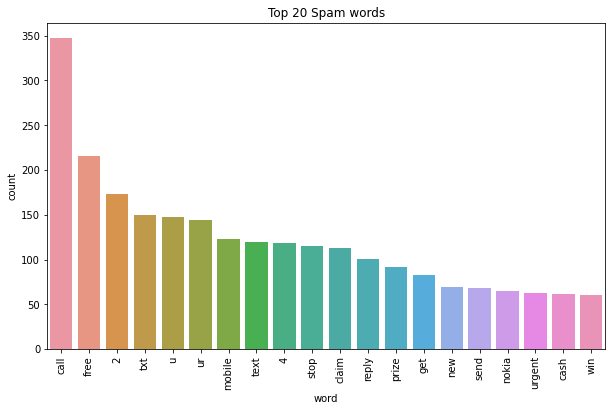

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical');

## Bag of Words

It’s an algorithm that transforms the text into fixed-length vectors. This is possible by counting the number of times the word is present in a document. The word occurrences allow to compare different documents and evaluate their similarities for applications, such as search, document classification, and topic modeling.

The reason for its name, “Bag-Of-Words”, is due to the fact that it represents the sentence as a bag of terms. It doesn’t take into account the order and the structure of the words, but it only checks if the words appear in the document.

In [45]:
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [47]:
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(df['input Text'])

In [48]:
print(len(bow_transformer.vocabulary_))

9532


This tell us that there are 9532 different words counted in the entire dataset.

In [53]:
sample_spam = df['input Text'][2]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)

print(bow_sample_spam)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 416)	1
  (0, 423)	1
  (0, 436)	1
  (0, 849)	1
  (0, 1242)	1
  (0, 2316)	1
  (0, 2541)	1
  (0, 3152)	2
  (0, 3290)	2
  (0, 3415)	1
  (0, 3571)	1
  (0, 5345)	1
  (0, 6738)	1
  (0, 6791)	1
  (0, 6848)	1
  (0, 8233)	1
  (0, 8398)	1
  (0, 8610)	1
  (0, 9117)	1
  (0, 9160)	1


This means that there are 21 unique words in message number 2 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [69]:
print(bow_transformer.get_feature_names()[3152])
print(bow_transformer.get_feature_names()[3290])

entry
fa


In [67]:
# Applying the transformer to entire input data
bow_data = bow_transformer.transform(df['input Text'])

In [66]:
print('Shape of Sparse Matrix: ', bow_data.shape)
print('Amount of Non-Zero occurences: ', bow_data.nnz)

Shape of Sparse Matrix:  (5574, 9532)
Amount of Non-Zero occurences:  50111


Sparsity refers to a matrix of numbers that includes many zeros or values that will not significantly impact a calculation.

In [68]:
sparsity = (100.0 * bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0
